# Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report

# Load the data


In [3]:
train = pd.read_csv("Dataset\heart_disease_train 2.csv")
test = pd.read_csv("Dataset\heart_disease_test_all.csv")

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Abrar Syed\AppData\Local\Temp\ipykernel_27032\3939166124.py:1: SyntaxWarning: invalid escape sequence '\h'
  train = pd.read_csv("Dataset\heart_disease_train 2.csv")
C:\Users\Abrar Syed\AppData\Local\Temp\ipykernel_27032\3939166124.py:2: SyntaxWarning: invalid escape sequence '\h'
  test = pd.read_csv("Dataset\heart_disease_test_all.csv")


In [4]:
train.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1000,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
1,PT1001,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
2,PT1002,60,M,NAP,141,316,1,ST,122,Y,1.7,Flat,1
3,PT1003,54,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1
4,PT1004,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1


In [5]:
train.shape
print(f"Number of rows: {train.shape[0]}")
print(f"Number of columns: {train.shape[1]}")

Number of rows: 734
Number of columns: 13


# Data PreProcessing

## Exploring Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              734 non-null    object 
 1   Age             734 non-null    int64  
 2   Gender          734 non-null    object 
 3   ChestPainType   734 non-null    object 
 4   RestingBP       734 non-null    int64  
 5   Cholesterol     734 non-null    int64  
 6   FastingBS       734 non-null    int64  
 7   RestingECG      734 non-null    object 
 8   MaxHR           734 non-null    int64  
 9   ExerciseAngina  734 non-null    object 
 10  Oldpeak         734 non-null    float64
 11  ST_Slope        734 non-null    object 
 12  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 74.7+ KB


In [7]:
train.nunique()

Id                734
Age                50
Gender              2
ChestPainType       4
RestingBP          63
Cholesterol       207
FastingBS           2
RestingECG          3
MaxHR             117
ExerciseAngina      2
Oldpeak            46
ST_Slope            3
HeartDisease        2
dtype: int64

### Chest Pain Type Frequency

<Axes: xlabel='ChestPainType', ylabel='count'>

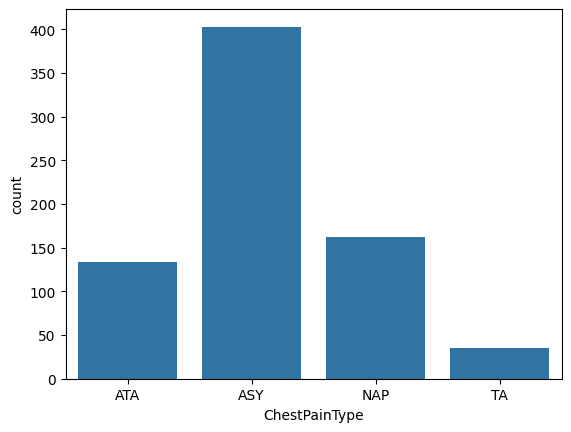

In [8]:
sns.countplot(data = train, x = 'ChestPainType')

### Age vs HeartDisease

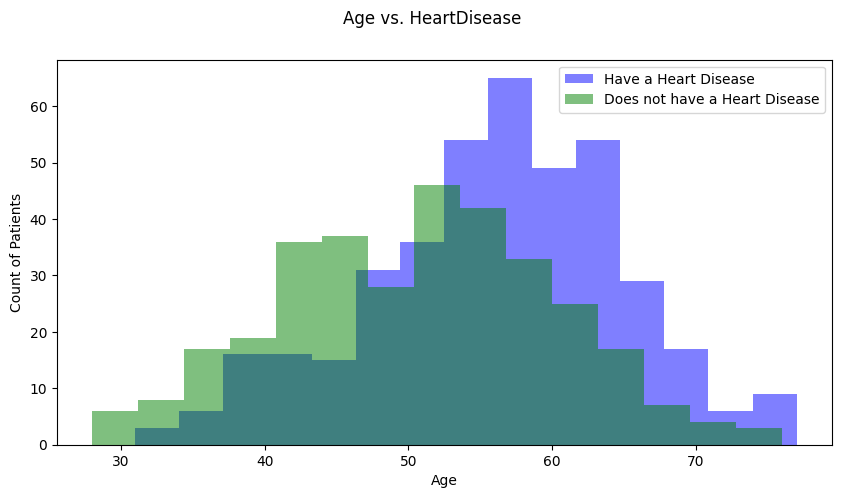

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(train[train["HeartDisease"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="Have a Heart Disease")
ax.hist(train[train["HeartDisease"]==0]["Age"], bins=15, alpha=0.5, color="green", label="Does not have a Heart Disease")

ax.set_xlabel("Age")
ax.set_ylabel("Count of Patients")

fig.suptitle("Age vs. HeartDisease")

ax.legend();

### Gender Vs Heart Disease

C:\Users\Abrar Syed\AppData\Local\Temp\ipykernel_27032\507468220.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train["HeartDisease"]==1]["Age"], shade=True, color="blue", label="Have a Heart Disease", ax=ax)
C:\Users\Abrar Syed\AppData\Local\Temp\ipykernel_27032\507468220.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train["HeartDisease"]==0]["Age"], shade=True, color="green", label="Does not have a Heart Disease", ax=ax)


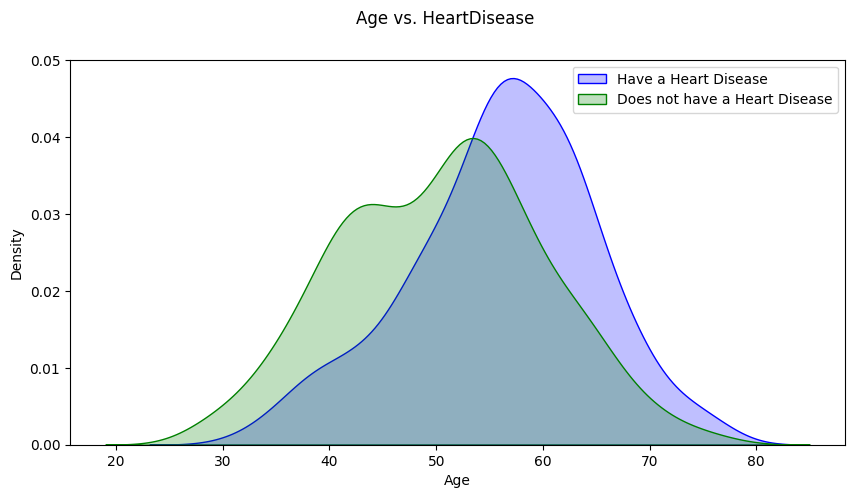

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

sns.kdeplot(train[train["HeartDisease"]==1]["Age"], shade=True, color="blue", label="Have a Heart Disease", ax=ax)
sns.kdeplot(train[train["HeartDisease"]==0]["Age"], shade=True, color="green", label="Does not have a Heart Disease", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. HeartDisease")

ax.legend();

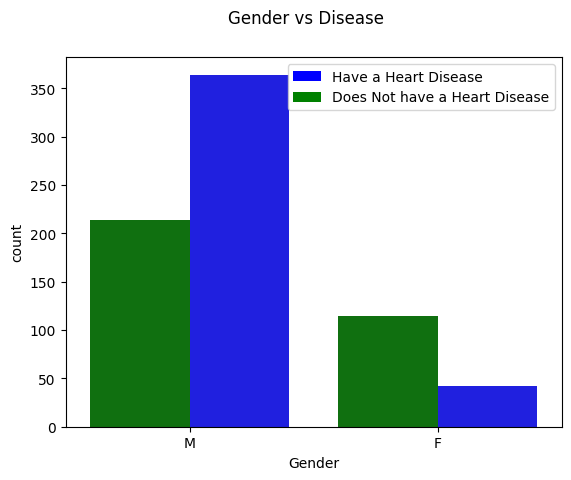

In [11]:
fig, ax = plt.subplots()

sns.countplot(x="Gender", hue="HeartDisease", data=train,
            palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("Gender")

color_patches = [
    Patch(facecolor="blue", label="Have a Heart Disease"),
    Patch(facecolor="green", label="Does Not have a Heart Disease")
]
ax.legend(handles=color_patches)

fig.suptitle("Gender vs Disease");

Id              734 non-null    object 
 1   Age             734 non-null    int64  
 2   Gender          734 non-null    object 
 3   ChestPainType   734 non-null    object 
 4   RestingBP       734 non-null    int64  
 5   Cholesterol     734 non-null    int64  
 6   FastingBS       734 non-null    int64  
 7   RestingECG      734 non-null    object 
 8   MaxHR           734 non-null    int64  
 9   ExerciseAngina  734 non-null    object 
 10  Oldpeak         734 non-null    float64
 11  ST_Slope        734 non-null    object 
 12  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 74.7+ KB

## Checking skewness

### Age

<Axes: >

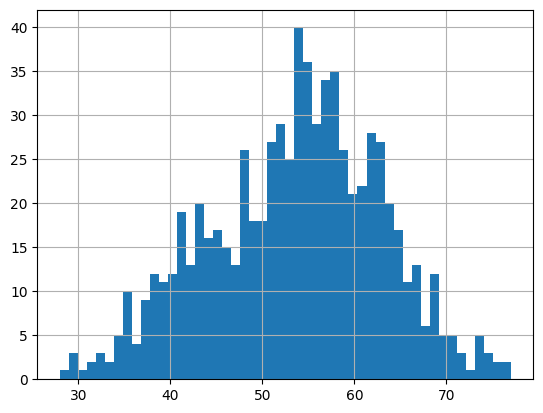

In [12]:
train['Age'].hist(bins=50)

### Cholesterol

<Axes: >

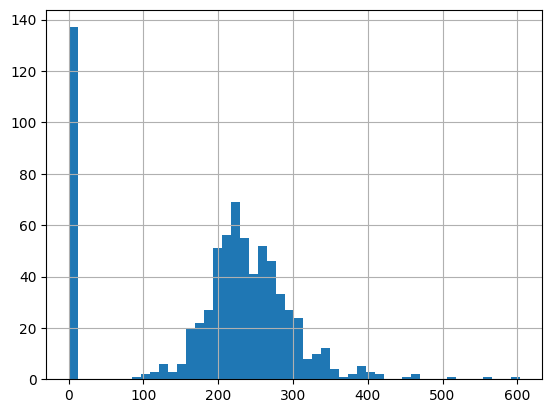

In [13]:
train['Cholesterol'].hist(bins=50)

### MaxHR

<Axes: >

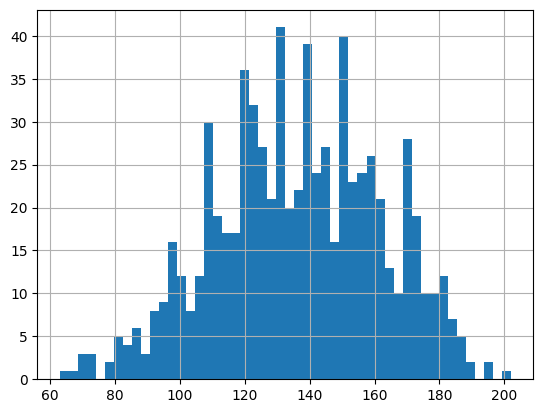

In [14]:
train['MaxHR'].hist(bins=50)

## Checking for null values

In [15]:
train.isna().sum()

Id                0
Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Checking for duplicate Values

In [16]:
train.duplicated().any()

False

## Checking for Outliers

### Age

<Axes: ylabel='Age'>

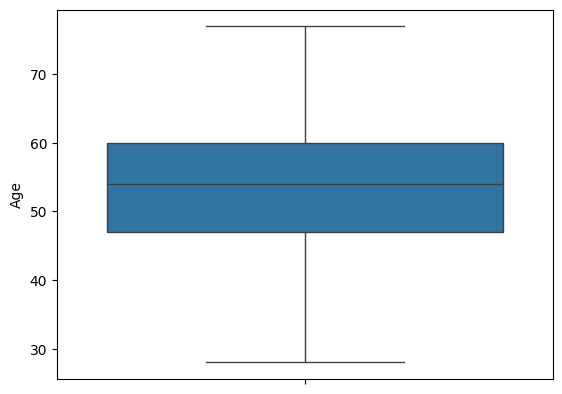

In [17]:
sns.boxplot(train["Age"])

### RestingBP

<Axes: ylabel='RestingBP'>

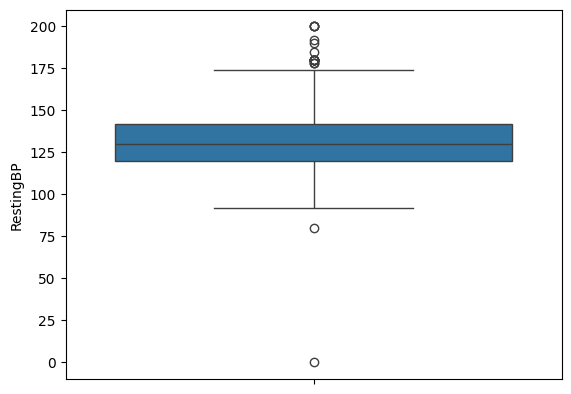

In [18]:
sns.boxplot(train["RestingBP"])

### Cholesterol

<Axes: ylabel='Cholesterol'>

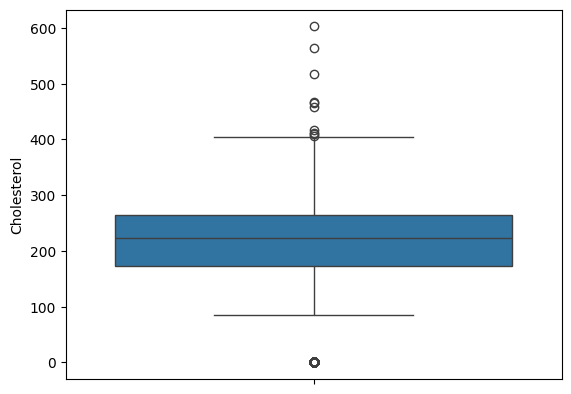

In [19]:
sns.boxplot(train["Cholesterol"])

### MaxHR

<Axes: ylabel='MaxHR'>

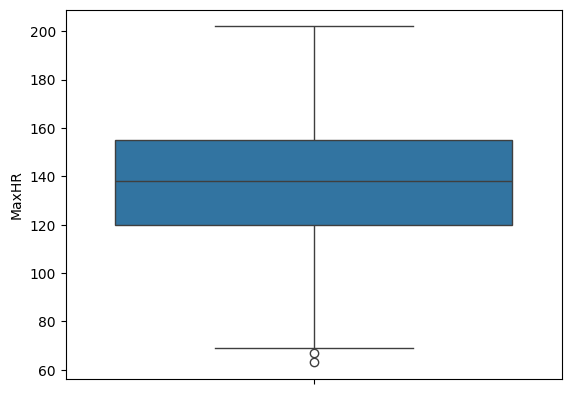

In [20]:
sns.boxplot(train["MaxHR"])

### Oldpeak

<Axes: ylabel='Oldpeak'>

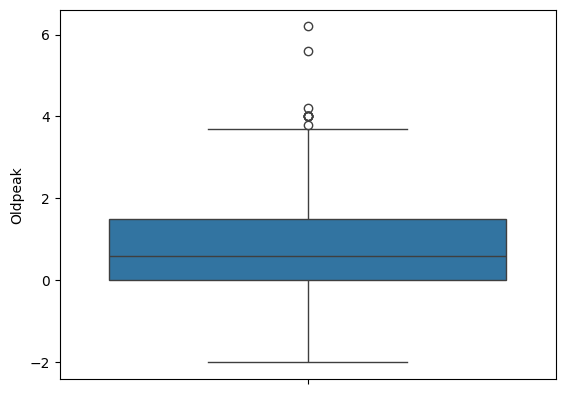

In [21]:
sns.boxplot(train["Oldpeak"])

## Removing the outliers

### RestingBP

In [22]:
quar_1=train['RestingBP'].quantile(0.25)
quar_3=train['RestingBP'].quantile(0.75)
i_quar=quar_3-quar_1

upper_cap=quar_3+1.5*(i_quar)
lower_cap=quar_1-1.5*(i_quar)
train['RestingBP']=np.where(train['RestingBP']<lower_cap,lower_cap,train['RestingBP'])
train['RestingBP']=np.where(train['RestingBP']>upper_cap,lower_cap,train['RestingBP'])

#now removing outlier form test dataset using train_values
test['RestingBP']=np.where(test['RestingBP']<lower_cap,lower_cap,test['RestingBP'])
test['RestingBP']=np.where(test['RestingBP']>upper_cap,lower_cap,test['RestingBP'])

<Axes: ylabel='RestingBP'>

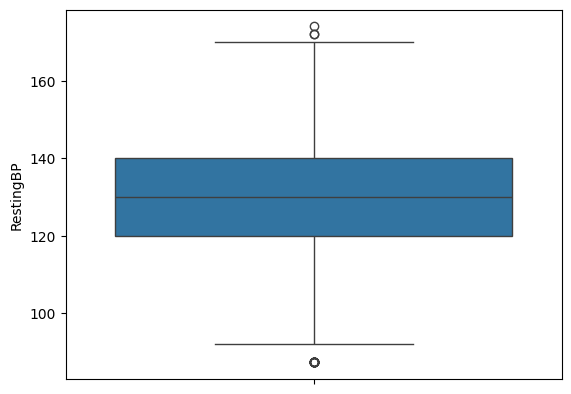

In [23]:
sns.boxplot(train["RestingBP"])

### Cholesterol

In [24]:
quar_1=train['Cholesterol'].quantile(0.25)
quar_3=train['Cholesterol'].quantile(0.75)
i_quar=quar_3-quar_1

upper_cap=quar_3+1.5*(i_quar)
lower_cap=quar_1-1.5*(i_quar)
train['Cholesterol']=np.where(train['Cholesterol']<lower_cap,lower_cap,train['Cholesterol'])
train['Cholesterol']=np.where(train['Cholesterol']>upper_cap,lower_cap,train['Cholesterol'])

#now removing outlier form test dataset using train_values
test['Cholesterol']=np.where(test['Cholesterol']<lower_cap,lower_cap,test['Cholesterol'])
test['Cholesterol']=np.where(test['Cholesterol']>upper_cap,lower_cap,test['Cholesterol'])

<Axes: ylabel='Cholesterol'>

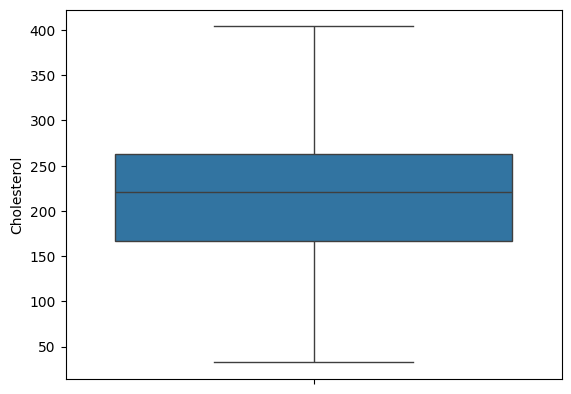

In [25]:
sns.boxplot(train["Cholesterol"])

### Oldpeak

In [26]:
quar_1=train['Oldpeak'].quantile(0.25)
quar_3=train['Oldpeak'].quantile(0.75)
i_quar=quar_3-quar_1

upper_cap=quar_3+1.5*(i_quar)
lower_cap=quar_1-1.5*(i_quar)
train['Oldpeak']=np.where(train['Oldpeak']<lower_cap,lower_cap,train['Oldpeak'])
train['Oldpeak']=np.where(train['Oldpeak']>upper_cap,lower_cap,train['Oldpeak'])

#now removing outlier form test dataset using train_values
test['Oldpeak']=np.where(test['Oldpeak']<lower_cap,lower_cap,test['Oldpeak'])
test['Oldpeak']=np.where(test['Oldpeak']>upper_cap,lower_cap,test['Oldpeak'])

<Axes: ylabel='Oldpeak'>

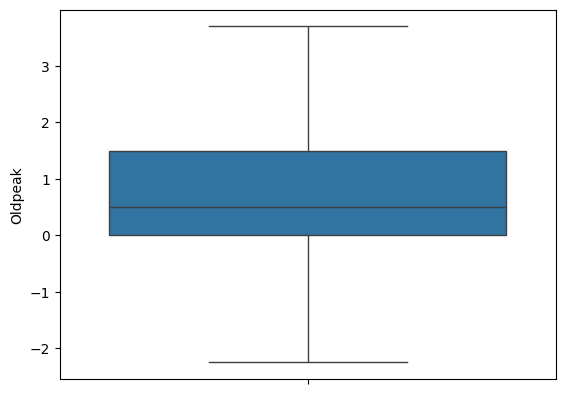

In [27]:
sns.boxplot(train["Oldpeak"])

## Label Encoding

### training dataset

In [28]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Gender'. 
train['Gender']= label_encoder.fit_transform(train['Gender'])   
train['Gender'].unique()

# Encode labels in column 'ChestPainType'.
train['ChestPainType']= label_encoder.fit_transform(train['ChestPainType'])   
train['ChestPainType'].unique()

# Encode labels in column 'RestingECG'.
train['RestingECG']= label_encoder.fit_transform(train['RestingECG'])   
train['RestingECG'].unique()

# Encode labels in column 'ExerciseAngina'.
train['ExerciseAngina']= label_encoder.fit_transform(train['ExerciseAngina'])   
train['ExerciseAngina'].unique()

# Encode labels in column 'ST_Slope'.
train['ST_Slope']= label_encoder.fit_transform(train['ST_Slope'])   
train['ST_Slope'].unique()

array([2, 1, 0])

In [29]:
train.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1000,42,1,1,120.0,198.0,0,1,155,0,0.0,2,0
1,PT1001,54,1,0,140.0,239.0,0,1,160,0,1.2,2,0
2,PT1002,60,1,2,141.0,316.0,1,2,122,1,1.7,1,1
3,PT1003,54,1,0,124.0,266.0,0,0,109,1,2.2,1,1
4,PT1004,55,1,1,160.0,292.0,1,1,143,1,2.0,1,1


### testing dataset

In [30]:
# Encode labels in column 'Gender'. 
test['Gender']= label_encoder.fit_transform(test['Gender'])   
test['Gender'].unique()

# Encode labels in column 'ChestPainType'.
test['ChestPainType']= label_encoder.fit_transform(test['ChestPainType'])   
test['ChestPainType'].unique()

# Encode labels in column 'RestingECG'.
test['RestingECG']= label_encoder.fit_transform(test['RestingECG'])   
test['RestingECG'].unique()

# Encode labels in column 'ExerciseAngina'.
test['ExerciseAngina']= label_encoder.fit_transform(test['ExerciseAngina'])   
test['ExerciseAngina'].unique()

# Encode labels in column 'ST_Slope'.
test['ST_Slope']= label_encoder.fit_transform(test['ST_Slope'])   
test['ST_Slope'].unique()

array([0, 2, 1])

In [31]:
test.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1800,64,1,0,134.0,273.0,0,1,102,1,-2.25,0,1
1,PT1801,58,1,0,114.0,318.0,0,2,140,0,-2.25,0,1
2,PT1802,47,0,1,140.0,257.0,0,1,135,0,1.00,2,0
3,PT1803,64,1,0,141.0,244.0,1,2,116,1,1.50,1,1
4,PT1804,47,1,2,110.0,32.5,1,1,120,1,0.00,1,1


# Feature Engineering

## Dropping ID column

In [32]:
train.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

In [33]:
train.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,1,1,120.0,198.0,0,1,155,0,0.0,2,0
1,54,1,0,140.0,239.0,0,1,160,0,1.2,2,0
2,60,1,2,141.0,316.0,1,2,122,1,1.7,1,1
3,54,1,0,124.0,266.0,0,0,109,1,2.2,1,1
4,55,1,1,160.0,292.0,1,1,143,1,2.0,1,1


## Splitting the data

In [34]:
x_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1].values
x_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

## Scaling

In [35]:
scaler=StandardScaler()
x_train_trans=scaler.fit_transform(x_train)
x_test_trans=scaler.transform(x_test)

# Training the data on different Models

## Decision Tree Model

### Training the Model

In [36]:
model_1 = DecisionTreeClassifier(max_depth=4,min_samples_leaf=3,random_state=42)
clf = model_1.fit(x_train_trans,y_train)


### Predicting the output

In [37]:

y_pred1 = clf.predict(x_test_trans)
y_pred_training = clf.predict(x_train_trans)

### Evaluation

In [38]:
accuracy1 = accuracy_score(y_test, y_pred1)
print("test-Accuracy:", accuracy1)
accuracy2 = accuracy_score(y_train, y_pred_training)
print("train-Accuracy:", accuracy2)

test-Accuracy: 0.8478260869565217
train-Accuracy: 0.8801089918256131


In [39]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        82
           1       0.88      0.84      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Ridge Logistic Regression

### Giving parameter value

In [86]:
alpha = 0.5


### Training the model

In [98]:
Model_2 = LogisticRegression(penalty="l2")
Model_2.fit(x_train_trans, y_train)

LogisticRegression()

### Predicting the output

In [99]:
y_pred2 = Model_2.predict(x_test_trans)
y_pred_training = Model_2.predict(x_train_trans)


### Evaluation

In [100]:
accuracy3 = accuracy_score(y_test, y_pred2)
print("test-Accuracy:", accuracy3)

accuracy4 = accuracy_score(y_train, y_pred_training)
print("train-Accuracy:", accuracy4)

test-Accuracy: 0.8586956521739131
train-Accuracy: 0.8487738419618529


In [44]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184



## SVC model

### Training the model

In [120]:
Model_3 = SVC() 
Model_3.fit(x_train_trans,y_train)

SVC()

### Getting the Prediction

In [121]:
y_pred3 = Model_3.predict(x_test_trans)
y_pred_training = Model_3.predict(x_train_trans)

### Evaluation

In [ ]:
accuracy5 = accuracy_score(y_test, y_pred3)
print("test-Accuracy:", accuracy5)

accuracy6 = accuracy_score(y_train, y_pred_training)
print("train-Accuracy:", accuracy6)

In [123]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.90      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

